## EDA

In [1]:
#import required packages
import pandas as pd 
import numpy as np
import warnings
from scipy.misc import imread
from scipy import sparse
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
import matplotlib_venn as venn
import string
import re    
import nltk
from nltk.corpus import stopwords
import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer   

# downloading stopwords
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')
nltk.download('wordnet')

color = sns.color_palette()
sns.set_style("dark")
eng_stopwords = set(stopwords.words("english"))
warnings.filterwarnings("ignore")

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

%matplotlib inline

[nltk_data] Downloading package stopwords to /Users/krut/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/krut/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# loading the data
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_test_labels = pd.read_csv('data/test_labels.csv')

In [3]:
# df_train
print(df_train.info())
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
None


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
# df_test
print(df_test.info())
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
id              153164 non-null object
comment_text    153164 non-null object
dtypes: object(2)
memory usage: 2.3+ MB
None


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [5]:
# df_test_labels
print(df_test_labels.info())
df_test_labels.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 7 columns):
id               153164 non-null object
toxic            153164 non-null int64
severe_toxic     153164 non-null int64
obscene          153164 non-null int64
threat           153164 non-null int64
insult           153164 non-null int64
identity_hate    153164 non-null int64
dtypes: int64(6), object(1)
memory usage: 8.2+ MB
None


,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


Text(0,0.5,'frequency')

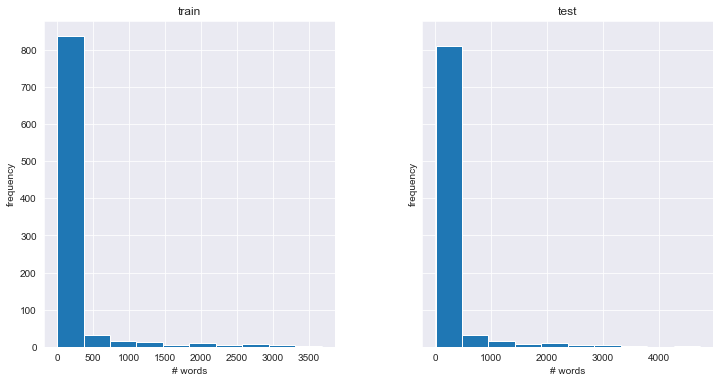

In [6]:
# sentence length distribution
df_no_words = pd.DataFrame()
df_no_words['train'] = df_train['comment_text'].str.split().apply(len).value_counts()
df_no_words['test'] = df_test['comment_text'].str.split().apply(len).value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=[12,6])
df_no_words.hist(column=['train'], ax=ax1)
ax1.set_xlabel("# words")
ax1.set_ylabel("frequency")
df_no_words.hist(column=['test'], ax=ax2)
ax2.set_xlabel("# words")
ax2.set_ylabel("frequency")

In [7]:
from utility import clean

df_train['comment_text_clean']=df_train['comment_text'].apply(lambda x :clean(x))
df_test['comment_text_clean']=df_test['comment_text'].apply(lambda x :clean(x))

[nltk_data] Downloading package stopwords to /Users/krut/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/krut/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
df_train.head()
df_test.head()

,id,comment_text,comment_text_clean
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule succesful ever whats hat sad ...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,rfc title fine imo
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",source zawe ashton lapland
3,00017563c3f7919a,":If you have a look back at the source, the in...",look back source information update correct f...
4,00017695ad8997eb,I don't anonymously edit articles at all.,anonymously edit article


Text(0,0.5,'frequency')

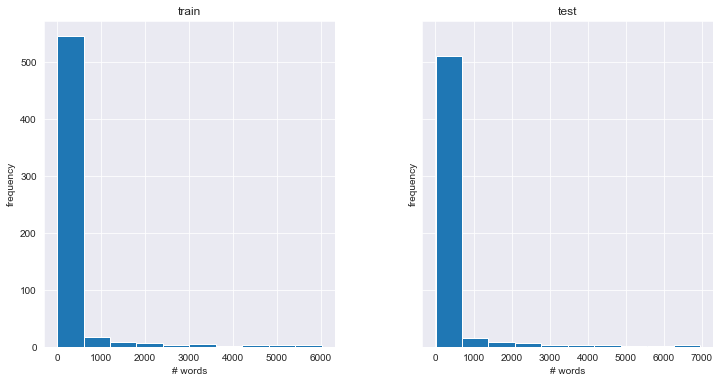

In [9]:
# sentence length distribution after cleaning
df_no_words = pd.DataFrame()
df_no_words['train'] = df_train['comment_text_clean'].str.split().apply(len).value_counts()
df_no_words['test'] = df_test['comment_text_clean'].str.split().apply(len).value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=[12,6])
df_no_words.hist(column=['train'], ax=ax1)
ax1.set_xlabel("# words")
ax1.set_ylabel("frequency")
df_no_words.hist(column=['test'], ax=ax2)
ax2.set_xlabel("# words")
ax2.set_ylabel("frequency")

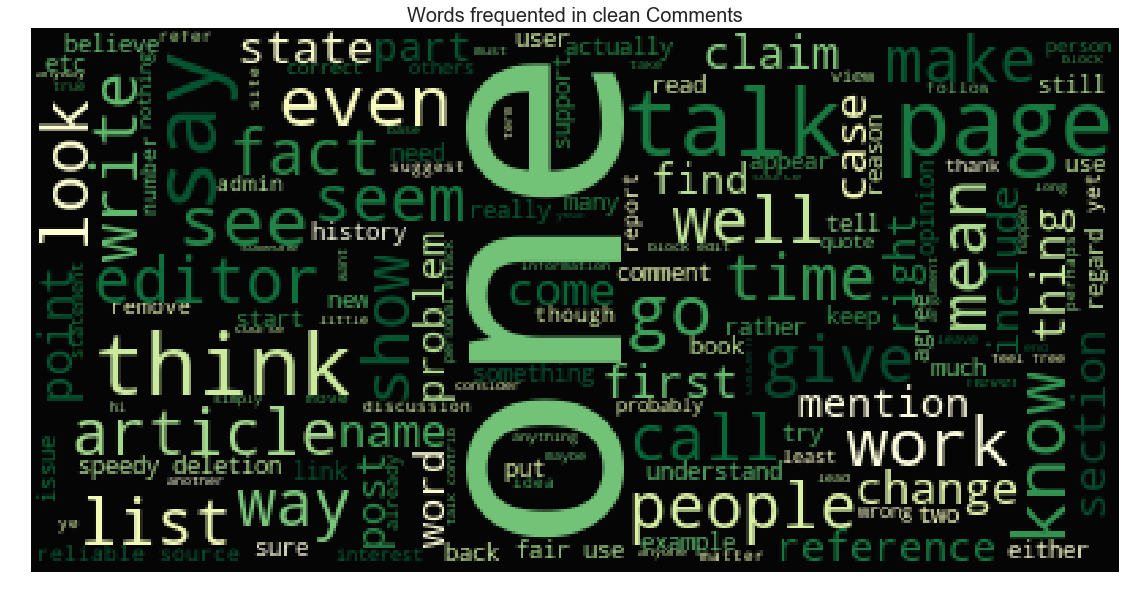

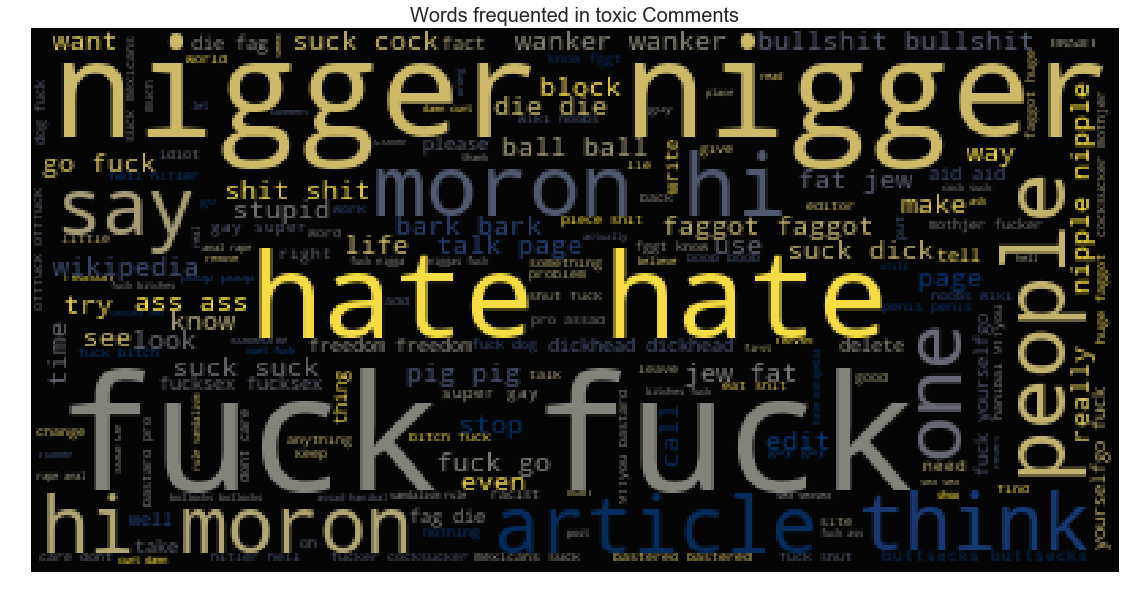

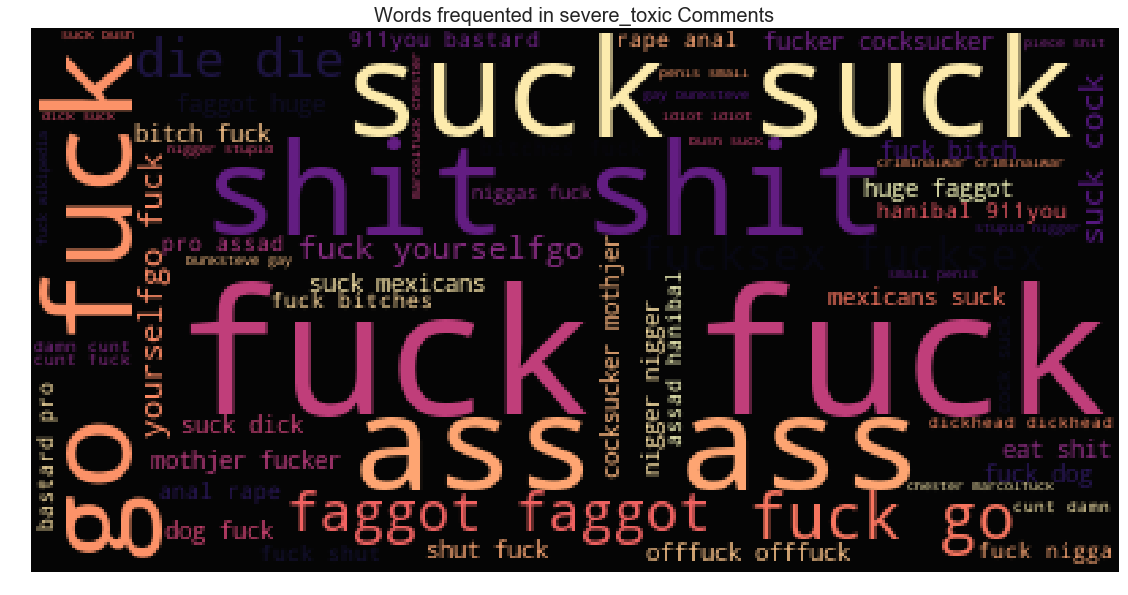

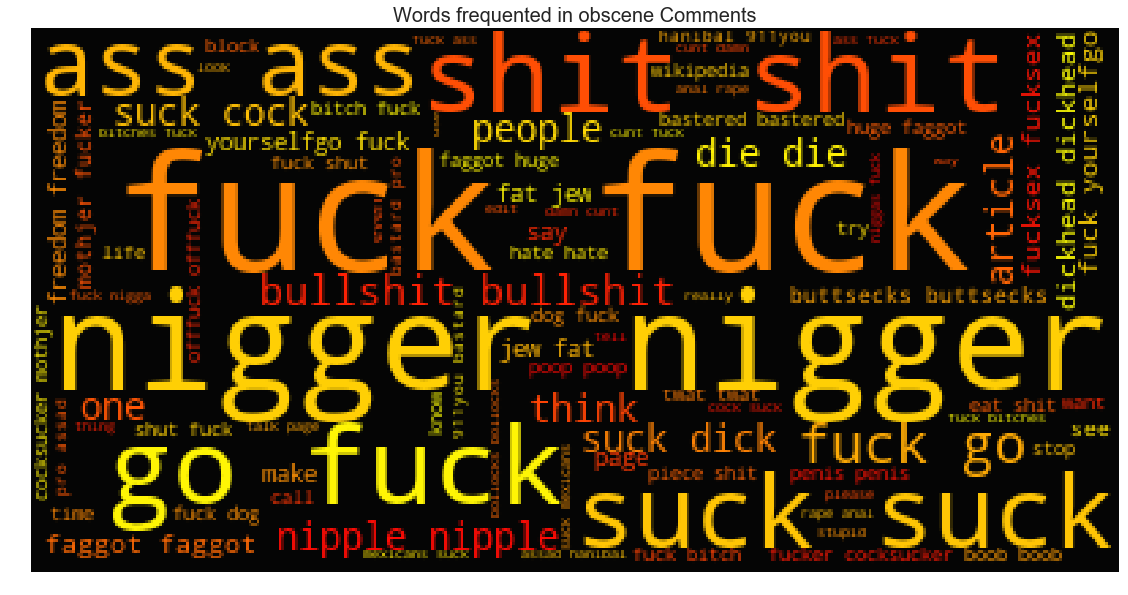

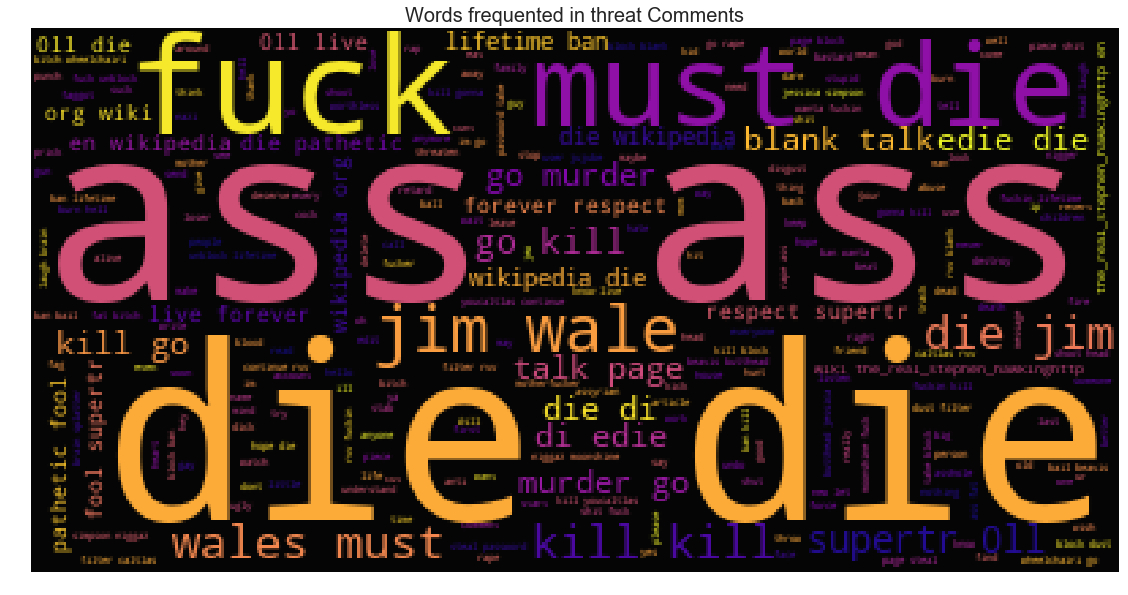

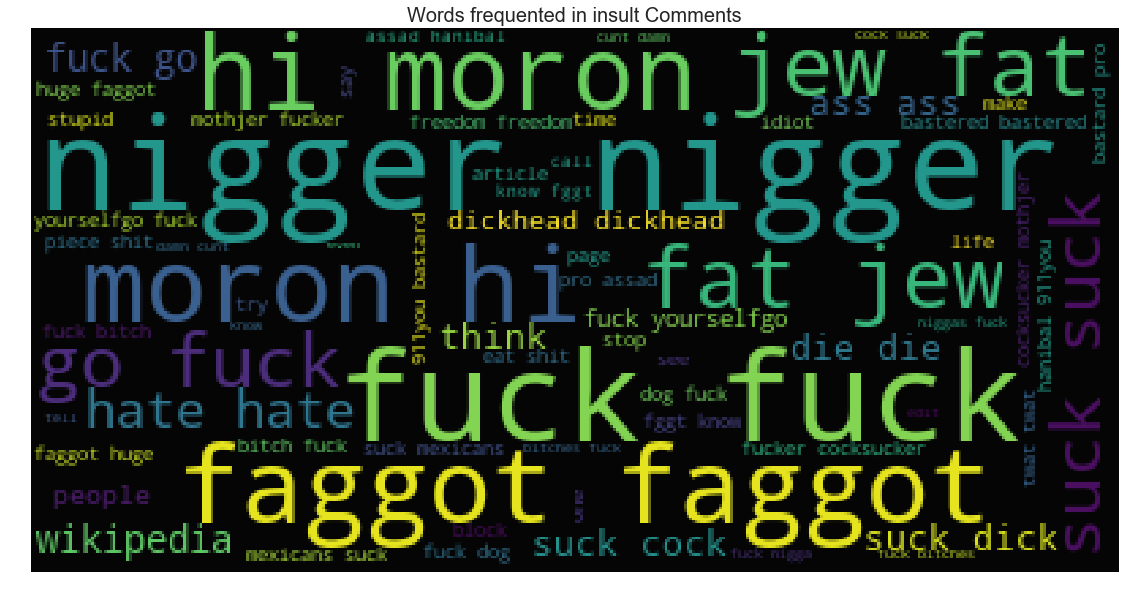

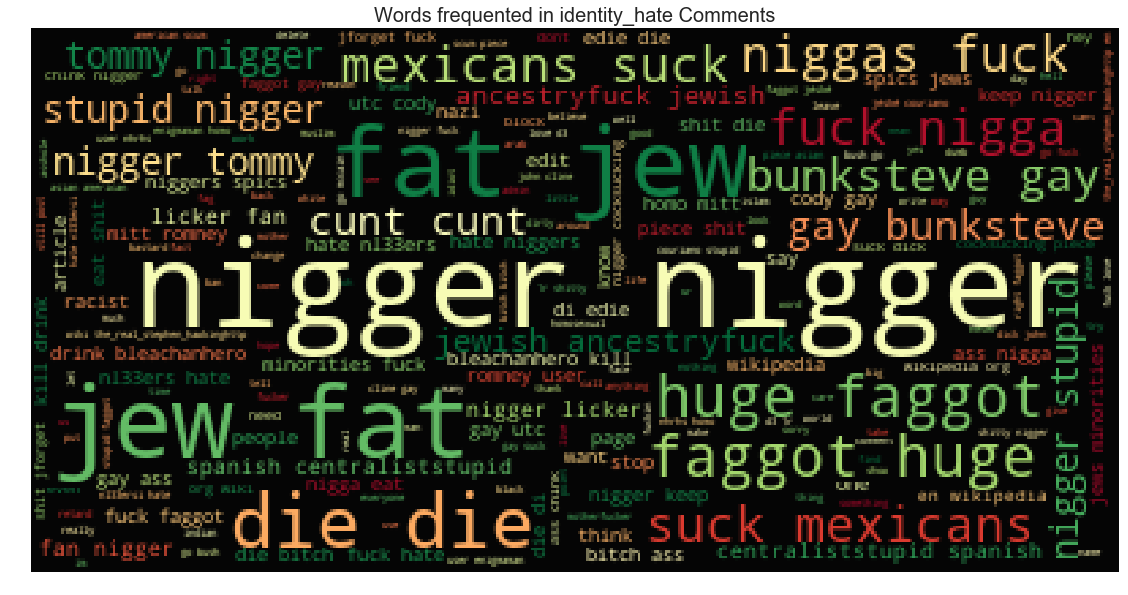

In [10]:
# word clouds for each category
subset=df_train[(df_train.toxic==0) & (df_train.severe_toxic==0) & (df_train.obscene==0) & (df_train.threat==0) & (df_train.insult==0) & (df_train.identity_hate==0)]
text=subset.comment_text_clean.values
wc= WordCloud(background_color="black",max_words=2000)
wc.generate(" ".join(text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Words frequented in clean Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'YlGn' , random_state=17), alpha=0.98)
plt.show()

# word clouds for each category
subset=df_train[df_train.toxic==True]
text=subset.comment_text_clean.values
wc= WordCloud(background_color="black",max_words=2000)
wc.generate(" ".join(text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Words frequented in toxic Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'cividis' , random_state=17), alpha=0.98)
plt.show()

# word clouds for each category
subset=df_train[df_train.severe_toxic==True]
text=subset.comment_text_clean.values
wc= WordCloud(background_color="black",max_words=2000)
wc.generate(" ".join(text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Words frequented in severe_toxic Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'magma' , random_state=17), alpha=0.98)
plt.show()

# word clouds for each category
subset=df_train[df_train.obscene==True]
text=subset.comment_text_clean.values
wc= WordCloud(background_color="black",max_words=2000)
wc.generate(" ".join(text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Words frequented in obscene Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'autumn' , random_state=17), alpha=0.98)
plt.show()

# word clouds for each category
subset=df_train[df_train.threat==True]
text=subset.comment_text_clean.values
wc= WordCloud(background_color="black",max_words=2000)
wc.generate(" ".join(text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Words frequented in threat Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'plasma' , random_state=17), alpha=0.98)
plt.show()

# word clouds for each category
subset=df_train[df_train.insult==True]
text=subset.comment_text_clean.values
wc= WordCloud(background_color="black",max_words=2000)
wc.generate(" ".join(text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Words frequented in insult Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

# word clouds for each category
subset=df_train[df_train.identity_hate==True]
text=subset.comment_text_clean.values
wc= WordCloud(background_color="black",max_words=2000)
wc.generate(" ".join(text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Words frequented in identity_hate Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'RdYlGn' , random_state=17), alpha=0.98)
plt.show()

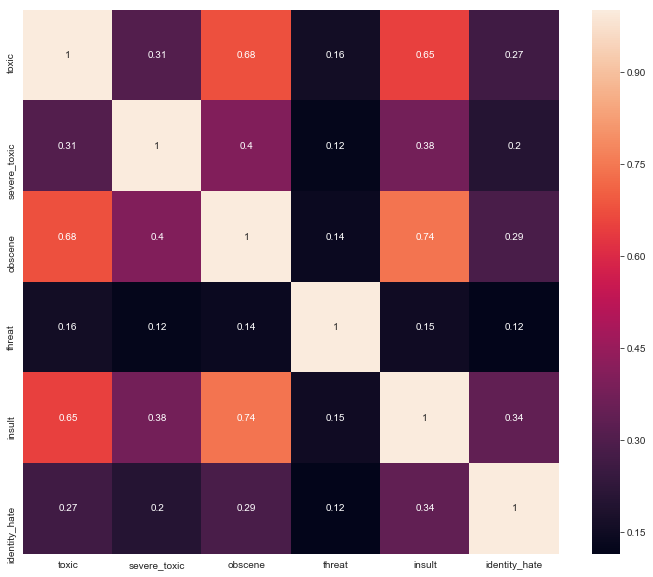

In [11]:
# Correlation between labels
df_correlation=df_train.iloc[:,2:-1]

correlation=df_correlation.corr()
plt.figure(figsize=(12,10))

sns.heatmap(correlation, xticklabels=correlation.columns.values, yticklabels=correlation.columns.values, annot=True)

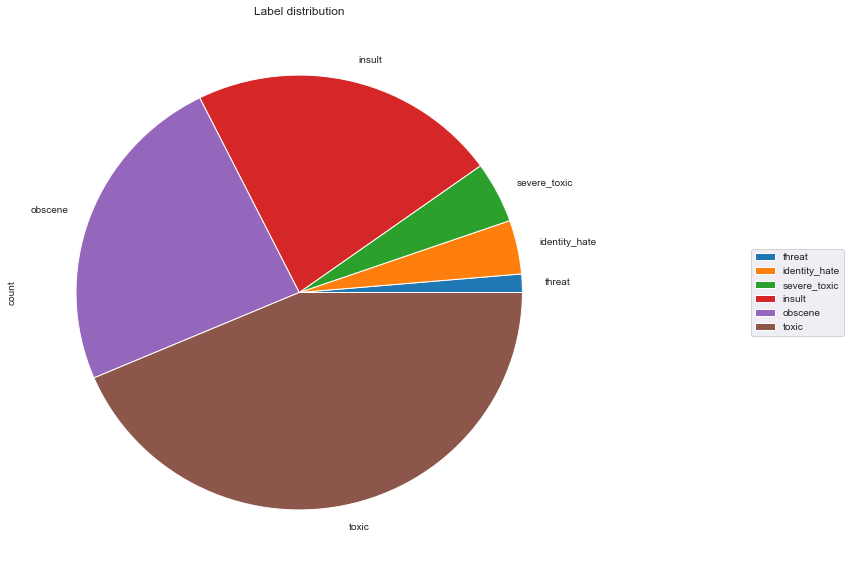

In [12]:
# Label distribution
df_dist = df_correlation.sum().to_frame().rename(columns={0: 'count'}).sort_values('count')

df_dist.plot.pie(y='count', title='Label distribution', figsize=(10, 10)).legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

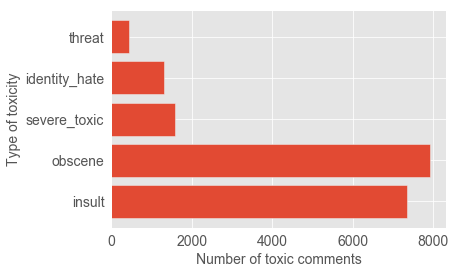

In [13]:
# Bar plot
abuse = df_train[df_train.toxic>0.5][['insult', 'obscene', 'severe_toxic', 'identity_hate', 'threat']]
plt.style.use('ggplot')
plt.barh(abuse.columns, abuse.sum().values, align='center')
plt.xlabel('Number of toxic comments',fontsize=14)
plt.ylabel('Type of toxicity', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks([0, 2000, 4000, 6000, 8000],fontsize=14)
plt.show()

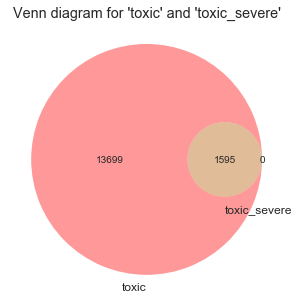

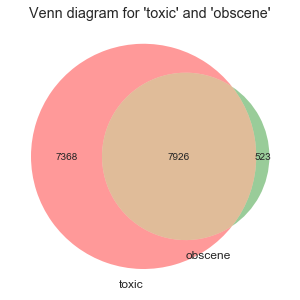

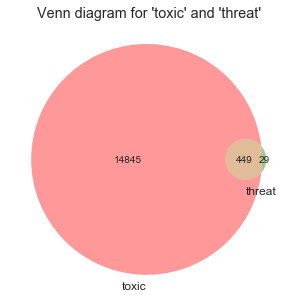

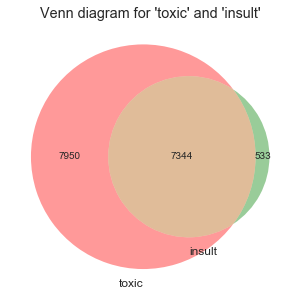

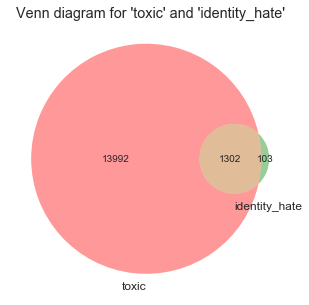

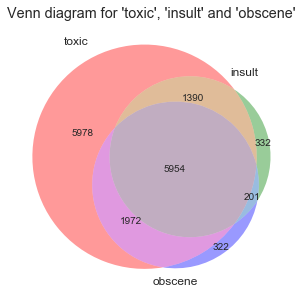

In [14]:
# Venn diagram for toxic and severe
toxic = df_train[(df_train['toxic'] == 1) & (df_train['severe_toxic'] == 0)].shape[0]
severe = df_train[(df_train['toxic'] == 0) & (df_train['severe_toxic'] == 1)].shape[0]
toxic_severe = df_train[(df_train['toxic'] == 1) & (df_train['severe_toxic'] == 1)].shape[0]

plt.figure(figsize=(5, 5))
plt.title("Venn diagram for 'toxic' and 'toxic_severe'")
venn.venn2(subsets = (toxic, severe, toxic_severe), set_labels=('toxic', 'toxic_severe'))
plt.plot()

# Venn diagram for toxic and obscene
toxic = df_train[(df_train['toxic'] == 1) & (df_train['obscene'] == 0)].shape[0]
obscene = df_train[(df_train['toxic'] == 0) & (df_train['obscene'] == 1)].shape[0]
toxic_obscene = df_train[(df_train['toxic'] == 1) & (df_train['obscene'] == 1)].shape[0]

plt.figure(figsize=(5, 5))
plt.title("Venn diagram for 'toxic' and 'obscene'")
venn.venn2(subsets = (toxic, obscene, toxic_obscene), set_labels=('toxic', 'obscene'))
plt.plot()

# Venn diagram for toxic and threat
toxic = df_train[(df_train['toxic'] == 1) & (df_train['threat'] == 0)].shape[0]
threat = df_train[(df_train['toxic'] == 0) & (df_train['threat'] == 1)].shape[0]
toxic_threat = df_train[(df_train['toxic'] == 1) & (df_train['threat'] == 1)].shape[0]

plt.figure(figsize=(5, 5))
plt.title("Venn diagram for 'toxic' and 'threat'")
venn.venn2(subsets = (toxic, threat, toxic_threat), set_labels=('toxic', 'threat'))
plt.plot()

# Venn diagram for toxic and insult
toxic = df_train[(df_train['toxic'] == 1) & (df_train['insult'] == 0)].shape[0]
insult = df_train[(df_train['toxic'] == 0) & (df_train['insult'] == 1)].shape[0]
toxic_insult = df_train[(df_train['toxic'] == 1) & (df_train['insult'] == 1)].shape[0]

plt.figure(figsize=(5, 5))
plt.title("Venn diagram for 'toxic' and 'insult'")
venn.venn2(subsets = (toxic, insult, toxic_insult), set_labels=('toxic', 'insult'))
plt.plot()

# Venn diagram for toxic and identity_hate
toxic = df_train[(df_train['toxic'] == 1) & (df_train['identity_hate'] == 0)].shape[0]
identity_hate = df_train[(df_train['toxic'] == 0) & (df_train['identity_hate'] == 1)].shape[0]
toxic_identity_hate = df_train[(df_train['toxic'] == 1) & (df_train['identity_hate'] == 1)].shape[0]

plt.figure(figsize=(5, 5))
plt.title("Venn diagram for 'toxic' and 'identity_hate'")
venn.venn2(subsets = (toxic, identity_hate, toxic_identity_hate), set_labels=('toxic', 'identity_hate'))
plt.plot()

# Venn diagram for toxic, insult and obscene
toxic = df_train[(df_train['toxic'] == 1) & (df_train['insult'] == 0) & (df_train['obscene'] == 0)].shape[0]
insult = df_train[(df_train['toxic'] == 0) & (df_train['insult'] == 1) & (df_train['obscene'] == 0)].shape[0]
obscene = df_train[(df_train['toxic'] == 0) & (df_train['insult'] == 0) & (df_train['obscene'] == 1)].shape[0]

toxic_insult = df_train[(df_train['toxic'] == 1) & (df_train['insult'] == 1) & (df_train['obscene'] == 0)].shape[0]
toxic_obscene = df_train[(df_train['toxic'] == 1) & (df_train['insult'] == 0) & (df_train['obscene'] == 1)].shape[0]
insult_obscene = df_train[(df_train['toxic'] == 0) & (df_train['insult'] == 1) & (df_train['obscene'] == 1)].shape[0]

toxic_insult_obscene = df_train[(df_train['toxic'] == 1) & (df_train['insult'] == 1) & (df_train['obscene'] == 1)].shape[0]


# Make the diagram
plt.figure(figsize=(5, 5))
plt.title("Venn diagram for 'toxic', 'insult' and 'obscene'")
venn.venn3(subsets = (toxic, insult, toxic_insult, obscene, toxic_obscene, insult_obscene, toxic_insult_obscene), 
      set_labels=('toxic', 'insult', 'obscene'))
plt.show()